Initial Dataset Overview:
   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43

<ipython-input-5-b3cca258837c>:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(grade_mapping)
<ipython-input-5-b3cca258837c>:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 1:-1] = data.iloc[:, 1:-1].fillna(data.iloc[:, 1:-1].mean())


Linear Regression R2 Score: 0.958
Lasso R2 Score: 0.174
Random Forest R2 Score: 0.937
Loaded Model R2 Score: 0.937
Predictions vs Actual:
   Predicted  Original
0    2.77184     2.851
1    3.51870     3.559
2    3.23384     3.241
3    3.48126     3.491
4    2.76742     2.608


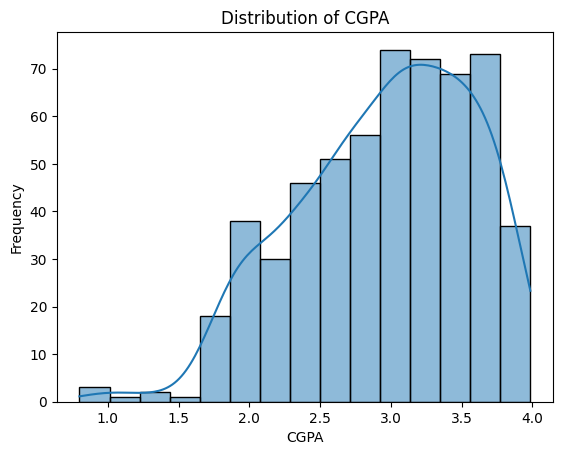

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

# Load dataset
data = pd.read_csv('Grades.csv')

# Data overview
print("Initial Dataset Overview:")
print(data.head())

# Rename columns for clarity (if necessary)
data.columns = [col.strip() for col in data.columns]

# Map grades to numeric values
grade_mapping = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'F': 0.0
}

# Replace grades with numeric values
for col in data.columns[1:-1]:  # Exclude 'Seat No.' and 'CGPA'
    data[col] = data[col].str.strip()  # Remove leading/trailing whitespace
    data[col] = data[col].replace(grade_mapping)

# Convert all feature columns to numeric, and coerce errors to NaN (if any)
data.iloc[:, 1:-1] = data.iloc[:, 1:-1].apply(pd.to_numeric, errors='coerce')

# Handle missing values only for numeric columns (excluding 'Seat No.' and 'CGPA')
data.iloc[:, 1:-1] = data.iloc[:, 1:-1].fillna(data.iloc[:, 1:-1].mean())

# Identify features and target
features = data.drop(columns=['Seat No.', 'CGPA'])
target = data['CGPA']

# Scale features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=12)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predict and evaluate
pred_test_lr = lr.predict(x_test)
lr_r2 = r2_score(y_test, pred_test_lr)
print(f"Linear Regression R2 Score: {lr_r2:.3f}")

# Regularization using Lasso
lasso = Lasso(alpha=0.1, random_state=0)
lasso.fit(x_train, y_train)
lasso_r2 = r2_score(y_test, lasso.predict(x_test))
print(f"Lasso R2 Score: {lasso_r2:.3f}")

# Random Forest Regressor
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train, y_train)
rf_r2 = r2_score(y_test, rf.predict(x_test))
print(f"Random Forest R2 Score: {rf_r2:.3f}")

# Save the model
model_path = 'cgpa_prediction_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(rf, file)

# Load and evaluate the model
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)
loaded_r2 = r2_score(y_test, loaded_model.predict(x_test))
print(f"Loaded Model R2 Score: {loaded_r2:.3f}")

# Generate a DataFrame with predictions and original values
comparison = pd.DataFrame({
    'Predicted': loaded_model.predict(x_test),
    'Original': y_test.values
})
print("Predictions vs Actual:")
print(comparison.head())

# Visualization of CGPA distribution
sns.histplot(data['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()
